In [57]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [50]:
spy_data = yf.download(['SPY'], '2021-01-01', '2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [85]:
spy_close = spy_data[['Adj Close']]
spy_close['shifted_close'] = spy_close['Adj Close'].shift(1)
spy_close

/var/folders/d7/91dqyhp52fb8zsybsj849cyw0000gn/T/ipykernel_39997/693229522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_close['shifted_close'] = spy_close['Adj Close'].shift(1)


,Adj Close,shifted_close
Date,,
2021-01-04,359.773285,NaN
2021-01-05,362.251129,359.773285
2021-01-06,364.416870,362.251129
2021-01-07,369.831177,364.416870
2021-01-08,371.938385,369.831177
...,...,...
2021-12-27,471.797485,465.213684
2021-12-28,471.411896,471.797485
2021-12-29,472.014954,471.411896


In [86]:
spy_returns = (spy_close['Adj Close'] - spy_close['shifted_close'])/(spy_close['shifted_close'])
spy_returns = spy_returns.iloc[1::]
spy_returns

Date
2021-01-05    0.006887
2021-01-06    0.005979
2021-01-07    0.014857
2021-01-08    0.005698
2021-01-11   -0.006741
                ...   
2021-12-27    0.014152
2021-12-28   -0.000817
2021-12-29    0.001279
2021-12-30   -0.002765
2021-12-31   -0.002520
Length: 251, dtype: float64

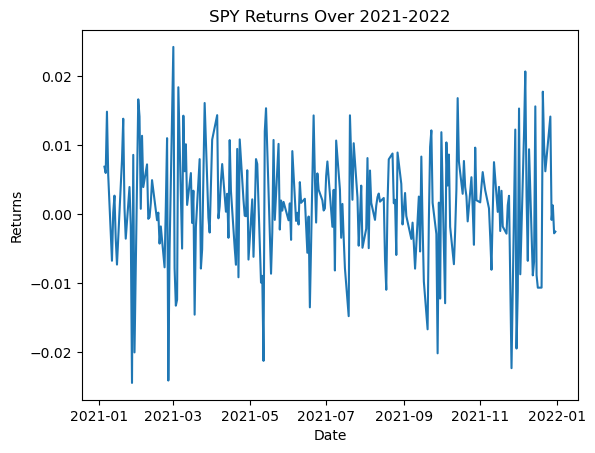

In [87]:
plt.plot(spy_returns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('SPY Returns Over 2021-2022')
plt.show()

# For Section on Volatility (Black-Scholes vs. Monte Carlo)

In [111]:
data = spy_returns.iloc[len(spy_returns)-10::]
data

Date
2021-12-17   -0.010643
2021-12-20   -0.010633
2021-12-21    0.017759
2021-12-22    0.009999
2021-12-23    0.006222
2021-12-27    0.014152
2021-12-28   -0.000817
2021-12-29    0.001279
2021-12-30   -0.002765
2021-12-31   -0.002520
dtype: float64

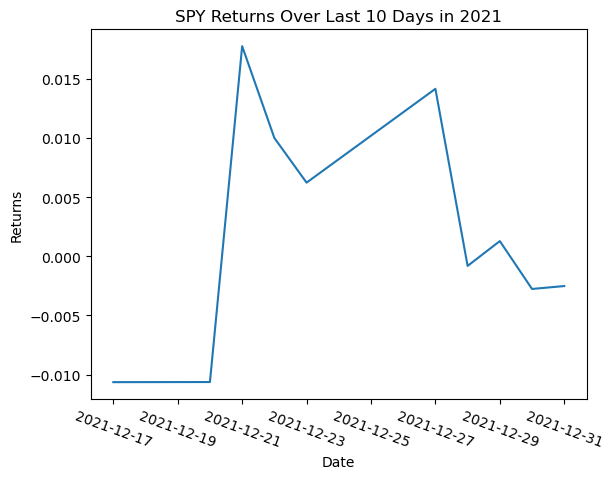

In [112]:
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('SPY Returns Over Last 10 Days in 2021')
plt.xticks(rotation=340)
plt.show()

In [113]:
# Calculation of return mean
mu_bar = 1/len(data) * data.sum()
mu_bar

0.0022033025673854146

In [114]:
# Calculation of $\sigma$
sigma = (((data - mu_bar)**2).sum()/len(data))**(1/2)
sigma

0.009211118975185928

In [115]:
# Convert to yearly volatility
y_sigma = sigma*10**(1/2)
y_sigma

0.029128115760383516